<a href="https://colab.research.google.com/github/ferrry-ghsb/bigdata_6team/blob/main/%EC%98%88%EC%B8%A1%EA%B0%92%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/BIgdata team/gro_train.csv').iloc[:, 1:]
valid = pd.read_csv('/content/drive/MyDrive/BIgdata team/gro_test.csv').iloc[:, 1:]

In [ ]:
valid

,0,1,2
0,0.364810,0.341317,0.328201
1,0.309653,0.161677,0.324055
2,0.340982,0.209581,0.327135
3,0.352785,0.263473,0.317660
4,0.138555,0.269461,0.317660
...,...,...,...
195,0.140099,0.143713,0.267914
196,0.179812,0.167665,0.253464
197,0.105019,0.113772,0.253464
198,0.265527,0.179641,0.253464


In [ ]:
train

,0,1,2
0,0.000000,0.000000,0.792965
1,0.292554,0.000000,0.792965
2,0.233977,0.000000,0.790951
3,0.226806,0.000000,0.792728
4,0.244457,0.000000,0.793675
...,...,...,...
1509,0.335245,0.185629,0.319673
1510,0.307998,0.173653,0.313159
1511,0.149366,0.137725,0.313159
1512,0.307998,0.161677,0.313159


In [ ]:
train.iloc[1:1+1, :].values

array([[0.29255378, 0.        , 0.79296459]])

In [ ]:
valid

,0,1,2
0,0.364810,0.341317,0.328201
1,0.309653,0.161677,0.324055
2,0.340982,0.209581,0.327135
3,0.352785,0.263473,0.317660
4,0.138555,0.269461,0.317660
...,...,...,...
195,0.140099,0.143713,0.267914
196,0.179812,0.167665,0.253464
197,0.105019,0.113772,0.253464
198,0.265527,0.179641,0.253464


In [ ]:
time_steps = 100
ts_train_len = len(train)
ts_valid_len = len(valid)
output = 2
for_periods = 14

In [ ]:
X_train = []
y_train = []
for i in range(time_steps, ts_train_len-1):
    X_train.append(train.iloc[i-time_steps:i])
    y_train.append(train.iloc[i:i+1, [0,2]].values.squeeze().tolist())
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_valid = []
y_valid = []
for i in range(time_steps, ts_valid_len-1):
    X_valid.append(valid.iloc[i-time_steps:i])
    y_valid.append(valid.iloc[i:i+1, [0,2]].values.squeeze().tolist())
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

In [ ]:
X_train.shape, y_train.shape

((1413, 100, 3), (1413, 2))

In [ ]:
X_valid.shape, y_valid.shape

((99, 100, 3), (99, 2))

In [ ]:
X_valid[0].shape

(100, 3)

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
        keras.layers.LSTM(100, input_shape=[None, X_train.shape[2]]),
        
        keras.layers.Dense(output)
])

In [ ]:
optimizer=keras.optimizers.Adam()

In [ ]:
optimizer.learning_rate = 0.01

In [ ]:
optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>

In [ ]:
model.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam())

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
45/45 [==============================] - 5s 80ms/step - loss: 0.0245 - val_loss: 0.0042
Epoch 2/100
45/45 [==============================] - 3s 65ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 3/100
45/45 [==============================] - 3s 65ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 4/100
45/45 [==============================] - 3s 65ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 5/100
45/45 [==============================] - 3s 64ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 6/100
45/45 [==============================] - 3s 62ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 7/100
45/45 [==============================] - 3s 62ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 8/100
45/45 [==============================] - 3s 63ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 9/100
45/45 [==============================] - 3s 63ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 10/100
45/45 [==============================] - 3s 65ms/step - loss: 0.0035 - val_loss: 0.0037

In [ ]:
keras.optimizers.Adam().learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

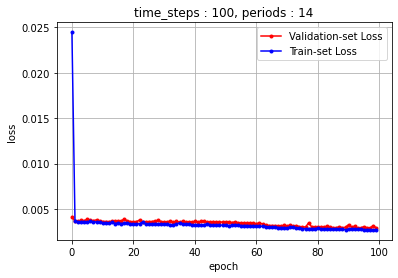

In [ ]:
import matplotlib.pyplot as plt
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.title(f'time_steps : {time_steps}, periods : {for_periods}')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
 model.predict(X_valid)

array([[0.32489854, 0.25042826],
       [0.2611653 , 0.25377315],
       [0.24584709, 0.2549672 ],
       [0.24785058, 0.26056805],
       [0.2434075 , 0.26606134],
       [0.2949392 , 0.27105314],
       [0.3233028 , 0.27273196],
       [0.31598186, 0.2747521 ],
       [0.26964214, 0.2756197 ],
       [0.24281125, 0.27749518],
       [0.23599899, 0.28117225],
       [0.23734222, 0.28557   ],
       [0.29129988, 0.29015237],
       [0.3124114 , 0.29446337],
       [0.31531978, 0.2965489 ],
       [0.26486686, 0.2851789 ],
       [0.20431179, 0.2763243 ],
       [0.21605751, 0.27254233],
       [0.24665116, 0.27325904],
       [0.3033825 , 0.27419728],
       [0.31204095, 0.2749513 ],
       [0.2966197 , 0.27032983],
       [0.2538735 , 0.26617688],
       [0.23780505, 0.25785172],
       [0.25728345, 0.25190789],
       [0.2602213 , 0.25084955],
       [0.30643916, 0.25135753],
       [0.32281524, 0.25618434],
       [0.29914036, 0.2496921 ],
       [0.24820541, 0.24011277],
       [0.

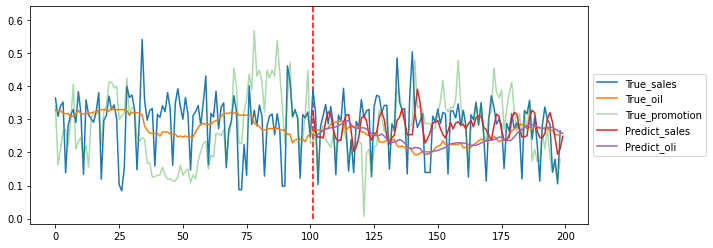

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 4))
plt.plot(valid.iloc[:-1, [0,2]])
plt.plot(valid.iloc[:-1, 1], alpha = 0.4)
plt.plot(range(1+time_steps, len(X_valid) + time_steps+1), model.predict(X_valid)[:, :])
plt.vlines(time_steps+1, 0, 1, color = 'red', linestyle = '--')
plt.ylim(valid.iloc[:-1, 0].values.min() - 0.1,valid.iloc[:-1, 0].values.max()+0.1)
plt.legend(['True_sales', 'True_oil', 'True_promotion', 'Predict_sales', 'Predict_oli'], loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()